## 使用MSE MAE R-Square评价回归模型

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 波士顿房产数据

In [6]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
x = boston.data[:,5] # 只使用房间数量这个特征

In [10]:
x.shape

(506,)

In [11]:
y = boston.target
y.shape

(506,)

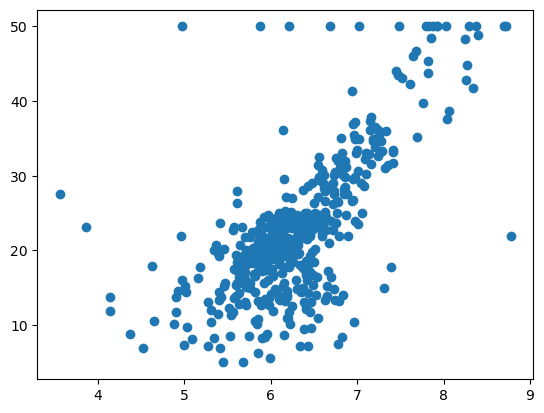

In [12]:
plt.scatter(x, y)
plt.show()

In [13]:
np.max(y)

50.0

In [14]:
x = x[y < 50.0]
y = y[y < 50.0]

In [15]:
x.shape

(490,)

In [16]:
y.shape

(490,)

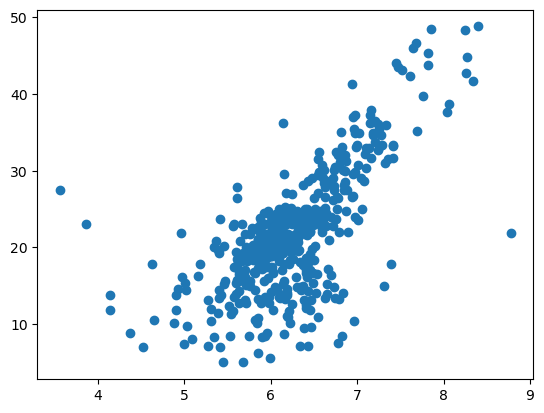

In [17]:
plt.scatter(x, y)
plt.show()

## 简单线性回归

In [18]:
from ML.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(392,)
(392,)
(98,)
(98,)


In [22]:
from ML.SimpleLinearRegression import SimpleLinearRegression2
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

SimpleLinearRegression2()

In [23]:
print(reg.a_)
print(reg.b_)

7.8608543562689555
-27.459342806705543


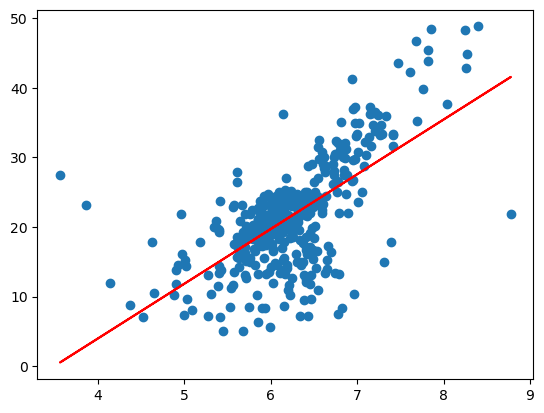

In [24]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

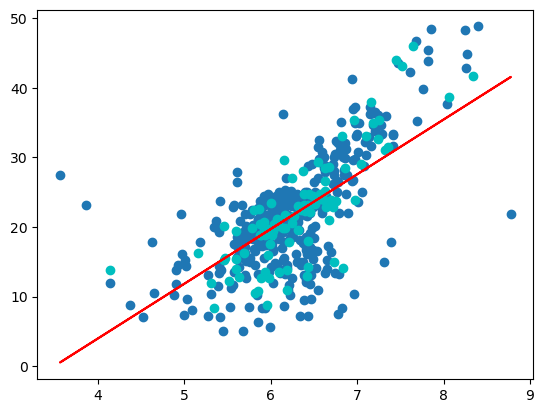

In [25]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="c")
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [26]:
y_predict = reg.predict(x_test)

## MSE

In [27]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

24.156602134387438

## RMSE

In [29]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

## MAE

In [30]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)
mae_test

3.5430974409463873

## R Square

baseline model

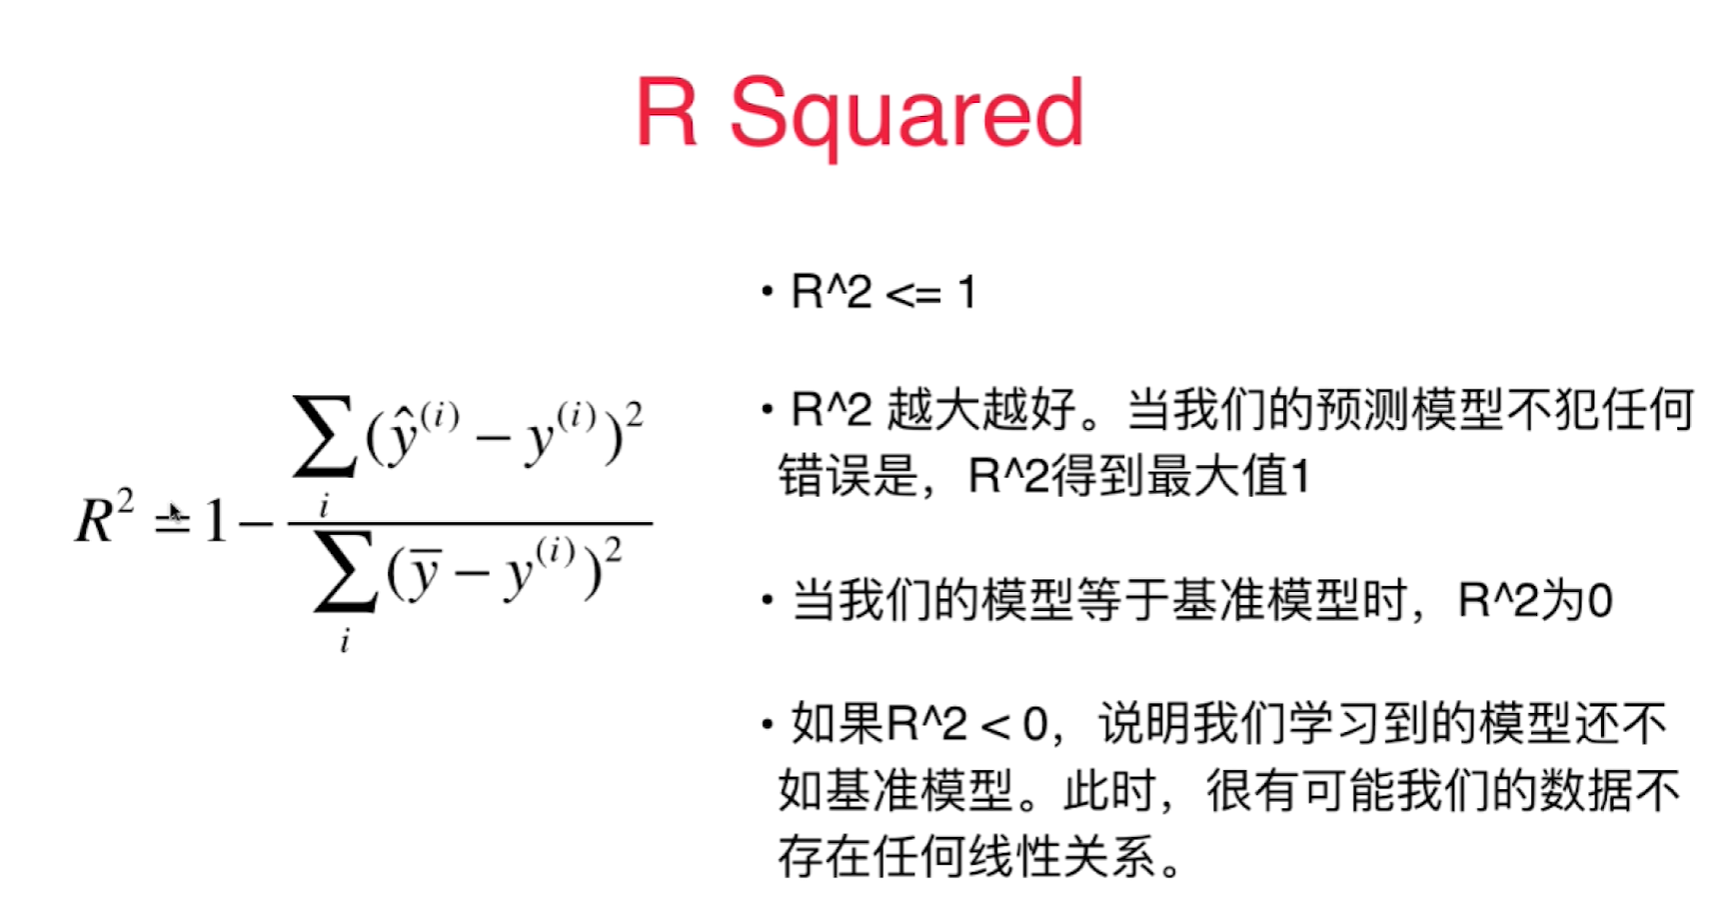

In [34]:
1 - mse_test/np.var(y_test)

0.6129316803937322

## 封装
[code](ML/metrics.py)

## scikit-learn中的MSE MAE R-Square

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [32]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [33]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

In [37]:
r2_score(y_test, y_predict)

0.6129316803937324